In [57]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
churn_data = pd.read_csv('data/churn.csv')
churn_df = churn_data.copy()
churn_df.drop('RowNumber', axis=1)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## <p style="text-align: center;"> Задание 9.1. </p> ##
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [58]:
churn_df['Exited'] = churn_df['Exited'].map({0 : 'Лояльные', 1 : 'Ушедшие'}) # Заменяем 0 и 1 на 'Лояльные' и 'Ушедшие'
exited = churn_df['Exited'].value_counts() # Считаем количество лояльных и ушедших

fig = px.pie(
    exited, 
    values='Exited', 
    names=exited.index,
    title='Cоотношение ушедших и лояльных клиентов'
)
fig.show()

Из графика видно, что количество ушедших клиентов составляет 20.4%, т.е примерно 1/5 от общего числа клиентов.

## <p style="text-align: center;"> Задание 9.2. </p> ##
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [59]:
filtered = churn_df[churn_df['Balance'] > 2500]

fig = px.histogram(
    filtered,
    x='Balance',
    nbins=20,
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
    text_auto=True
    
)
fig.show()

Из графика видно, что у наибольшего числа клиентов на балансе находится от 100 до 140 тысяч долларов. Больше 200 тысяч долларов на балансе имеют 34 клиента.

## <p style="text-align: center;"> Задание 9.3. </p> ##
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [60]:
fig = px.box(
    churn_df,
    x='Exited',
    y='Balance',
    title='Распределение баланса клиента в разрезе признака оттока'
)
fig.show()

Из графика видно, что количество клиентов с нулевым балансом среди лояльных клиентов не менее четверти. Это может свидетельствовать о наличии у них кредитных продуктов. Медианные значения ушедших и лояльных клиентов довольно близки и находятся возле отметки 100000. 

## <p style="text-align: center;"> Задание 9.4. </p> ##
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [61]:
fig = px.box(
    churn_df,
    x='Exited',
    y='Age',
    title='Распределение возраста клиента в разрезе признака оттока'
)
fig.show()

Из графика видно, что число потенциальных выбросов среди группы лояльных клиентов значительно больше, чем в группе ушедших. Возраст ушедших превышает возраст лояльных клиентов, поэтому банку следует обратить внимание на клиентов старше 40 лет.

## <p style="text-align: center;"> Задание 9.5. </p> ##
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [62]:
salary_data = churn_df.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
fig = px.scatter(
    salary_data,
    x='EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=600,
    width=1000,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.show()

Поскольку на диаграмме точки разбросаны хаотично, установить взаимосвязь между кредитным рейтингом и заработной платой не представляется возможным. Также нет зависимости этих признаков от признака оттока.

## <p style="text-align: center;"> Задание 9.6. </p> ##
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [63]:
churn_df['Exited'] = churn_df['Exited'].map({'Лояльные': 0, 'Ушедшие': 1}) # меняем 'Лояльные' и 'Ушедшие' на 0 и 1
gender_exited_data = churn_df.groupby('Gender', as_index=False)['Exited'].mean() # считаем средние значения
fig = px.bar(
    gender_exited_data,
    x='Gender',
    y='Exited'
)
fig.show()

Из графика видно, что среди женщин процент ушедших вышем, чем среди мужчин.

## <p style="text-align: center;"> Задание 9.7. </p> ##
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [64]:

churn_df['Exited'] = churn_df['Exited'].map({0 : 'Лояльные', 1 : 'Ушедшие'}) # Заменяем 0 и 1 на 'Лояльные' и 'Ушедшие'
exiting_data = churn_df.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()
fig = px.bar(
    exiting_data,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    title='Зависимость оттока клиентов от числа приобретенных услуг',
    labels={'NumOfProducts':'Количество приобретённых услуг'}, height=400)

fig.show()

Из графика видно, что количество клиентов, которые приобрели 3 либо 4 услуги, около 3% от общего числа. Среди тех, кто приобрел 1 или 2 услуги, отток больше у первой группы.

## <p style="text-align: center;"> Задание 9.8. </p> ##
 Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [65]:
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].map({0 : 'Неактивные', 1 : 'Активные'}) # Заменяем 0 и 1 на 'Неактивные' и 'Активные'
exiting_data = churn_df.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()
fig = px.bar(
    exiting_data,
    x='IsActiveMember',
    y='CustomerId',
    color='Exited',
    title='Влияние статуса активного клиента на отток клиентов'
)
fig.show()

Среди неактивных клиентов отток значительно больше. Банку следует предложить неактивным клиентам какие-либо бонусы при условии, что те начнут активно пользоваться услугами банка.

## <p style="text-align: center;"> Задание 9.9. </p> ##
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [66]:
churn_df['Exited'] = churn_df['Exited'].map({'Лояльные': 0, 'Ушедшие': 1}) # меняем 'Лояльные' и 'Ушедшие' на 0 и 1
country = churn_df.groupby(['Geography'], as_index=False).agg('mean')

fig = px.choropleth(
    data_frame=country, 
    locations="Geography", 
    locationmode = "country names", 
    color='Exited', 
    range_color=[0, 0.5], 
    title='Распределение ушедших клиентов по странам', 
    width=800, 
    height=500, 
    color_continuous_scale='Inferno' 
)

fig.show()

C:\Temp\ipykernel_7956\1631818649.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



В Германии доля ушедших клиентов больше, чем в других странах. Причины этого могут быть разные, но проанализировав и сравнив различные средние показатели по странам, можно убедиться в том, что все показатели, кроме баланса на счетах клиента, очень близки. Средний баланс на счетах в Германии примерно в 2 раза выше, чем в других странах. Возможно, в других банках Германии как-то поощряется наличие на счетах крупных сумм и данному банку стоит рассмотреть возможность внедрения программы поощрения держателей крупных сумм, чтобы уменьшить отток клиентов.

## <p style="text-align: center;"> Задание 9.10. </p> ##
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Тепловая карта оттока клиентов')

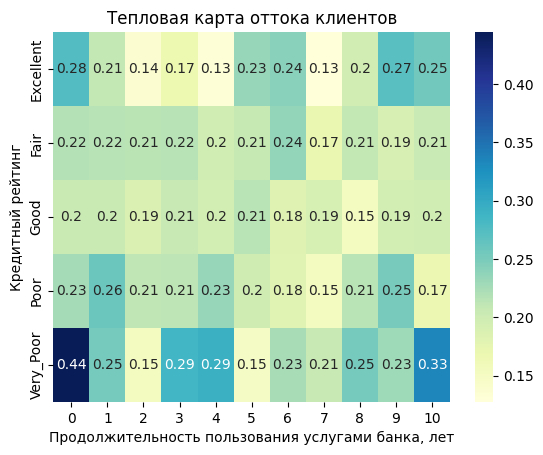

In [67]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"    
    
churn_df['CreditScore'] = churn_df['CreditScore'].apply(get_credit_score_cat)
pivot = churn_df.pivot_table(
    values='Exited',
    index='CreditScore',
    columns='Tenure',
    fill_value=0
)
heatmap = sns.heatmap(pivot, cmap='YlGnBu', annot=True)
heatmap.set(xlabel="Продолжительность пользования услугами банка, лет", ylabel="Кредитный рейтинг")
heatmap.set_title('Тепловая карта оттока клиентов')

Согласно полученным данным, чаще всего уходят клиенты с низким кредитным рейтингом (нижняя часть таблицы самая темная). Среди них чаще всего уходят новые клиенты (продолжительность пользования услугами банка до 1 года). 